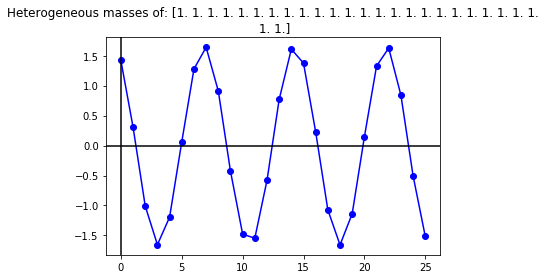

In [23]:
#Problem 2 part a
import numpy as np
import math
import matplotlib.pyplot as plt

N=26
k_spring=6
omega=2
C=1

#mass_array=np.zeros(N)
mass_array=np.ones(N)
#mass_array[13]=10

#for i in range(N):
#    mass_array[i]=np.random.uniform(1,10)

alpha_array=(2*k_spring)-mass_array*(omega**2)

v_answer_array=np.zeros(N)
v_answer_array[0]=C

Main_Array=np.zeros((N,N))

Main_Array[0,0]=alpha_array[0]-k_spring
Main_Array[0,1]=-k_spring
Main_Array[N-1,N-1]=alpha_array[N-1]-k_spring
Main_Array[N-1,N-2]=-k_spring

for i in range(1,N-1):
    Main_Array[i,i-1]=-k_spring
    Main_Array[i,i]=alpha_array[i]
    Main_Array[i,i+1]=-k_spring

for m in range(N):
    for k in range(N-1):
        maxindex = abs(Main_Array[k:,k]).argmax() + k
        if (maxindex != k):
            Main_Array[[k,maxindex]] = Main_Array[[maxindex, k]]
            v_answer_array[[k,maxindex]] = v_answer_array[[maxindex, k]]
        for row in range(k+1, N):
            multiplier = Main_Array[row,k]/Main_Array[k,k]
            Main_Array[row,k] = 0
            for col in range(k + 1, N):
                Main_Array[row,col] = Main_Array[row,col] - multiplier*Main_Array[k,col]
            v_answer_array[row] = v_answer_array[row] - multiplier*v_answer_array[k]

    div=Main_Array[m,m]
    Main_Array[m,:]/=div
    v_answer_array[m]/=div

    for i in range(m+1,N):
        mult = Main_Array[i,m]
        Main_Array[i,:]-=mult*Main_Array[m,:]
        v_answer_array[i]-=mult*v_answer_array[m]

xes=np.empty(N,float)

for m in range(N-1,-1,-1):
    xes[m]=v_answer_array[m]
    for i in range(m+1,N):
        xes[m]-=Main_Array[m,i]*xes[i]

title_string="Heterogeneous masses of: "+str(np.around(mass_array,2))

plt.plot(xes,'b-o')
plt.title(title_string)
plt.axhline(color="k")
plt.axvline(color="k")
plt.show()

Equation 6.56 is the following:

$$
\begin{bmatrix} 
(\alpha-k) & -k \\
-k & \alpha & -k \\
0 & -k & \alpha & -k \\
0 & 0 & -k & \alpha & -k \\
0&0&0&...\\
0&0&0&0&0&(\alpha-k)
\end{bmatrix}
·
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
...\\
...\\
x_N
\end{bmatrix}
=
\begin{bmatrix}
C\\
0\\
0\\
...\\
...\\
0
\end{bmatrix}
$$

After plugging in the mass array (and converting it into an alpha array, pivoting code will rearrange the matrix and this will reduce rounding error. 

For part a, I used a mass array where all the masses are equal to 1. The solution creates a graph of a simple sine wave. 

For part b, I created a mass array of random float values between 1 and 10. This was to play with the settings and to check the effectiveness of the pivot step.

For part c, the 13th mass was made to be 10, while the rest of the masses were equal to 1. This effectively creates a nearly wall-like phenomenon where the amplitudes of masses 1-12 are significantly higher than those of masses 13-26. This is because the inertia of mass 13 is much higher than those of the surrounding masses. 

For part d, the 13th mass was made to be 0.1. The rest of the masses were equal to 1. This led to a situation where it nearly becomes negligible, and the space between mass 12 and mass 14 is doubled, making the effective spring constant between those masses half k.This is because the inertia of mass 13 is much lower than those of the surrounding masses.  

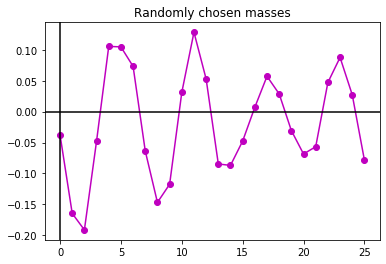

In [24]:
#Problem 2 part b
import numpy as np
import math
import matplotlib.pyplot as plt

N=26
k_spring=6
omega=1
C=1

#mass_array=np.zeros(N)
mass_array=np.ones(N)
#mass_array[13]=10

for i in range(N):
    mass_array[i]=np.random.uniform(1,10)

alpha_array=(2*k_spring)-mass_array*(omega**2)

v_answer_array=np.zeros(N)
v_answer_array[0]=C

Main_Array=np.zeros((N,N))

Main_Array[0,0]=alpha_array[0]-k_spring
Main_Array[0,1]=-k_spring
Main_Array[N-1,N-1]=alpha_array[N-1]-k_spring
Main_Array[N-1,N-2]=-k_spring

for i in range(1,N-1):
    Main_Array[i,i-1]=-k_spring
    Main_Array[i,i]=alpha_array[i]
    Main_Array[i,i+1]=-k_spring

for m in range(N):
    for k in range(N-1):
        maxindex = abs(Main_Array[k:,k]).argmax() + k
        if (maxindex != k):
            Main_Array[[k,maxindex]] = Main_Array[[maxindex, k]]
            v_answer_array[[k,maxindex]] = v_answer_array[[maxindex, k]]
        for row in range(k+1, N):
            multiplier = Main_Array[row][k]/Main_Array[k][k]
            Main_Array[row][k] = 0
            for col in range(k + 1, N):
                Main_Array[row][col] = Main_Array[row][col] - multiplier*Main_Array[k][col]
            v_answer_array[row] = v_answer_array[row] - multiplier*v_answer_array[k]

    div=Main_Array[m,m]
    Main_Array[m,:]/=div
    v_answer_array[m]/=div

    for i in range(m+1,N):
        mult = Main_Array[i,m]
        Main_Array[i,:]-=mult*Main_Array[m,:]
        v_answer_array[i]-=mult*v_answer_array[m]

xes=np.empty(N,float)

for m in range(N-1,-1,-1):
    xes[m]=v_answer_array[m]
    for i in range(m+1,N):
        xes[m]-=Main_Array[m,i]*xes[i]

title_string="Randomly chosen masses"

plt.plot(xes,'m-o')
plt.title(title_string)
plt.axhline(color="k")
plt.axvline(color="k")
plt.show()

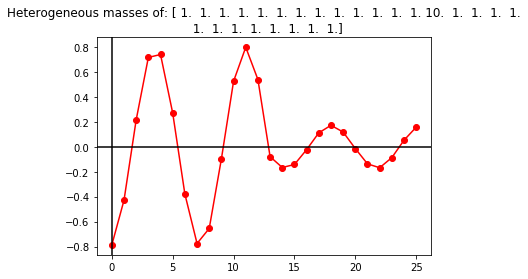

In [25]:
#Problem 2 part c
import numpy as np
import math
import matplotlib.pyplot as plt

N=26
k_spring=6
omega=2
C=1

#mass_array=np.zeros(N)
mass_array=np.ones(N)
mass_array[13]=10

#for i in range(N):
#    mass_array[i]=np.random.uniform(1,10)

alpha_array=(2*k_spring)-mass_array*(omega**2)

v_answer_array=np.zeros(N)
v_answer_array[0]=C

Main_Array=np.zeros((N,N))

Main_Array[0,0]=alpha_array[0]-k_spring
Main_Array[0,1]=-k_spring
Main_Array[N-1,N-1]=alpha_array[N-1]-k_spring
Main_Array[N-1,N-2]=-k_spring

for i in range(1,N-1):
    Main_Array[i,i-1]=-k_spring
    Main_Array[i,i]=alpha_array[i]
    Main_Array[i,i+1]=-k_spring

for m in range(N):
    for k in range(N-1):
        maxindex = abs(Main_Array[k:,k]).argmax() + k
        if (maxindex != k):
            Main_Array[[k,maxindex]] = Main_Array[[maxindex, k]]
            v_answer_array[[k,maxindex]] = v_answer_array[[maxindex, k]]
        for row in range(k+1, N):
            multiplier = Main_Array[row][k]/Main_Array[k][k]
            Main_Array[row][k] = 0
            for col in range(k + 1, N):
                Main_Array[row][col] = Main_Array[row][col] - multiplier*Main_Array[k][col]
            v_answer_array[row] = v_answer_array[row] - multiplier*v_answer_array[k]

    div=Main_Array[m,m]
    Main_Array[m,:]/=div
    v_answer_array[m]/=div

    for i in range(m+1,N):
        mult = Main_Array[i,m]
        Main_Array[i,:]-=mult*Main_Array[m,:]
        v_answer_array[i]-=mult*v_answer_array[m]

xes=np.empty(N,float)

for m in range(N-1,-1,-1):
    xes[m]=v_answer_array[m]
    for i in range(m+1,N):
        xes[m]-=Main_Array[m,i]*xes[i]

title_string="Heterogeneous masses of: "+str(np.around(mass_array,2))

plt.plot(xes,'r-o')
plt.title(title_string)
plt.axhline(color="k")
plt.axvline(color="k")
plt.show()

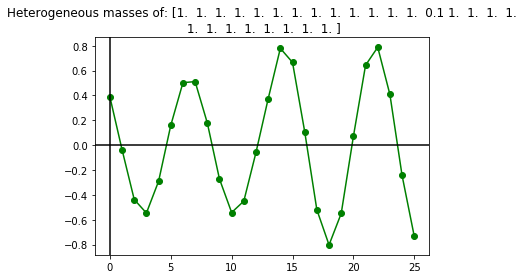

In [26]:
#Problem 2 part d
import numpy as np
import math
import matplotlib.pyplot as plt

N=26
k_spring=6
omega=2
C=1

#mass_array=np.zeros(N)
mass_array=np.ones(N)
mass_array[13]=0.1

#for i in range(N):
#    mass_array[i]=np.random.uniform(1,10)

alpha_array=(2*k_spring)-mass_array*(omega**2)

v_answer_array=np.zeros(N)
v_answer_array[0]=C

Main_Array=np.zeros((N,N))

Main_Array[0,0]=alpha_array[0]-k_spring
Main_Array[0,1]=-k_spring
Main_Array[N-1,N-1]=alpha_array[N-1]-k_spring
Main_Array[N-1,N-2]=-k_spring

for i in range(1,N-1):
    Main_Array[i,i-1]=-k_spring
    Main_Array[i,i]=alpha_array[i]
    Main_Array[i,i+1]=-k_spring

for m in range(N):
    for k in range(N-1):
        maxindex = abs(Main_Array[k:,k]).argmax() + k
        if (maxindex != k):
            Main_Array[[k,maxindex]] = Main_Array[[maxindex, k]]
            v_answer_array[[k,maxindex]] = v_answer_array[[maxindex, k]]
        for row in range(k+1, N):
            multiplier = Main_Array[row][k]/Main_Array[k][k]
            Main_Array[row][k] = 0
            for col in range(k + 1, N):
                Main_Array[row][col] = Main_Array[row][col] - multiplier*Main_Array[k][col]
            v_answer_array[row] = v_answer_array[row] - multiplier*v_answer_array[k]

    div=Main_Array[m,m]
    Main_Array[m,:]/=div
    v_answer_array[m]/=div

    for i in range(m+1,N):
        mult = Main_Array[i,m]
        Main_Array[i,:]-=mult*Main_Array[m,:]
        v_answer_array[i]-=mult*v_answer_array[m]

xes=np.empty(N,float)

for m in range(N-1,-1,-1):
    xes[m]=v_answer_array[m]
    for i in range(m+1,N):
        xes[m]-=Main_Array[m,i]*xes[i]

title_string="Heterogeneous masses of: "+str(np.around(mass_array,2))

plt.plot(xes,'g-o')
plt.title(title_string)
plt.axhline(color="k")
plt.axvline(color="k")
plt.show()